In [1]:
import numpy as np
import pandas as pd
import datetime
import json

<a id="part-1"></a>
## US Data
We'll start with a subset of the data (US) before expanding to include the entire dataset

In [2]:
us_yt = pd.read_csv('../input/youtube-trending-video-dataset/US_youtube_trending_data.csv')
display(us_yt.head())
print(us_yt.columns)


video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
3  2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg            XXL          10   
4  2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate          26   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   
2  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
3  2020-08-12T00:00:00Z  xxl freshman|xxl freshmen|2020 xxl freshman|20...   
4  2020-08-12T00:00:00Z  The LaBrant Family|DIY|Interior Design|Makeove...   

   view_count   likes  dislikes  comment_count  \
0     1514614  156908      5855          35313   
1     2381688  146739      2794          16549   
2     2038853  353787      2628          40221   
3      496771   23251      1856           7647   
4     1123889   45802       964           2196   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg              False   
1  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg              False   
2  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg              False   
3  https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg              False   
4  https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg              False   

   ratings_disabled                                        description  
0             False  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...  
1             False  While running her own modding shop, Ramya Pare...  
2             False  I left youtube for a month and this is what ha...  
3             False  Subscribe to XXL → http://bit.ly/subscribe-xxl...  
4             False  Transforming The LaBrant Family's empty white ...

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')


In [3]:
#another curiousity of mine
us_yt.categoryId.nunique()#.unique_count().sum()
us_yt.head()

video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
3  2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg            XXL          10   
4  2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate          26   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   
2  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
3  2020-08-12T00:00:00Z  xxl freshman|xxl freshmen|2020 xxl freshman|20...   
4  2020-08-12T00:00:00Z  The LaBrant Family|DIY|Interior Design|Makeove...   

   view_count   likes  dislikes  comment_count  \
0     1514614  156908      5855          35313   
1     2381688  146739      2794          16549   
2     2038853  353787      2628          40221   
3      496771   23251      1856           7647   
4     1123889   45802       964           2196   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg              False   
1  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg              False   
2  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg              False   
3  https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg              False   
4  https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg              False   

   ratings_disabled                                        description  
0             False  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...  
1             False  While running her own modding shop, Ramya Pare...  
2             False  I left youtube for a month and this is what ha...  
3             False  Subscribe to XXL → http://bit.ly/subscribe-xxl...  
4             False  Transforming The LaBrant Family's empty white ...

In [4]:
us_yt[us_yt["view_count"].idxmax():us_yt["view_count"].idxmax()+1]

video_id                             title           publishedAt  \
56374  WMweEpGlu_U  BTS (방탄소년단) 'Butter' Official MV  2021-05-21T03:46:13Z   

                      channelId channelTitle  categoryId  \
56374  UC3IZKseVpdzPSBaWxBxundA  HYBE LABELS          10   

              trending_date                             tags  view_count  \
56374  2021-05-30T00:00:00Z  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   264407389   

          likes  dislikes  comment_count  \
56374  16021534    150989        6738537   

                                       thumbnail_link  comments_disabled  \
56374  https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg              False   

       ratings_disabled                                        description  
56374             False  BTS (방탄소년단) 'Butter' Official MV Credits: Dire...

In [5]:
corrolation_list = ['view_count', 'likes', 'dislikes', 'comment_count']
hm_data = us_yt[corrolation_list].corr() 
display(hm_data)
#This will trim down the number of columns we are looking for correlations between
#this exceeds the scope of the initial question but i want to know a little more for myself 

view_count     likes  dislikes  comment_count
view_count       1.000000  0.844812  0.646885       0.514903
likes            0.844812  1.000000  0.622699       0.686961
dislikes         0.646885  0.622699  1.000000       0.519846
comment_count    0.514903  0.686961  0.519846       1.000000

This is the pearson correlation values:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1 = a strong positive correlation<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0 = no correlation<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -1 = strong negative correlation.

This shows that there is a strong positive correlation with number of likes and number of views, while there is a moderate correlation between views and comment count 


In [6]:
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot


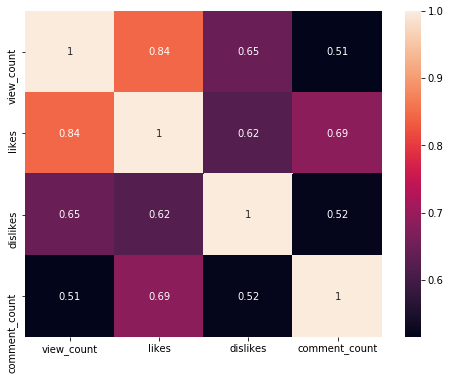

In [7]:
# to help you visualize these correlations, see the plots below
# the lighter the colour the higher the correlation

matplotlib.pyplot.figure(figsize=(8,6))
sns.heatmap(hm_data, annot=True);

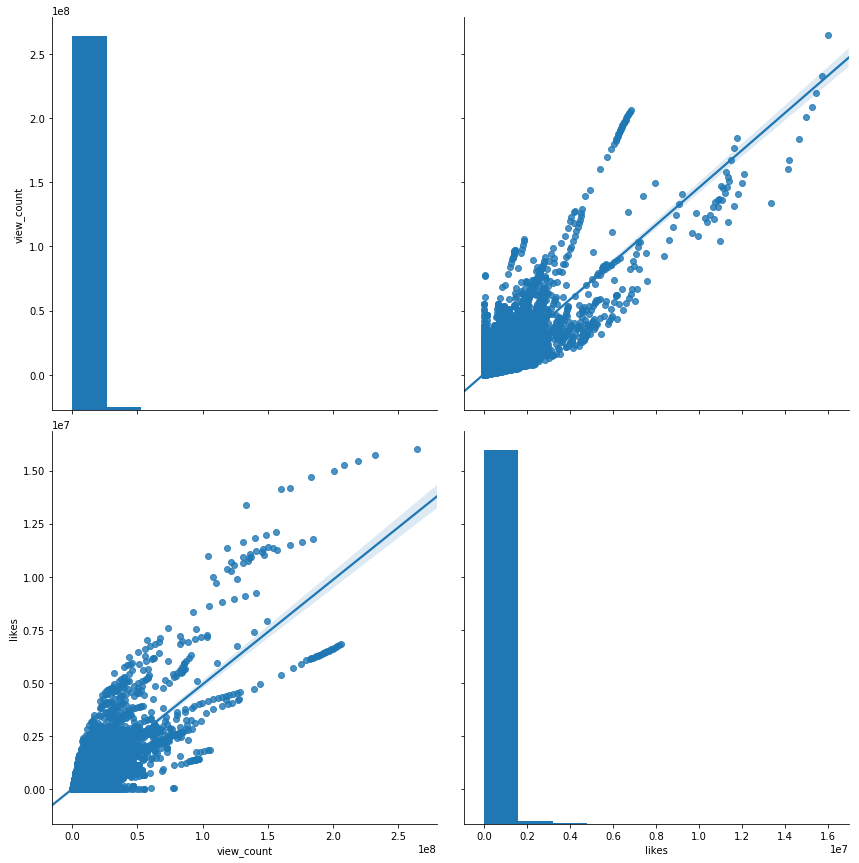

In [8]:
#matplotlib.pyplot.figure(figsize=(12,12))
sns.pairplot(us_yt[['view_count', 'likes']], kind='reg',height=6);

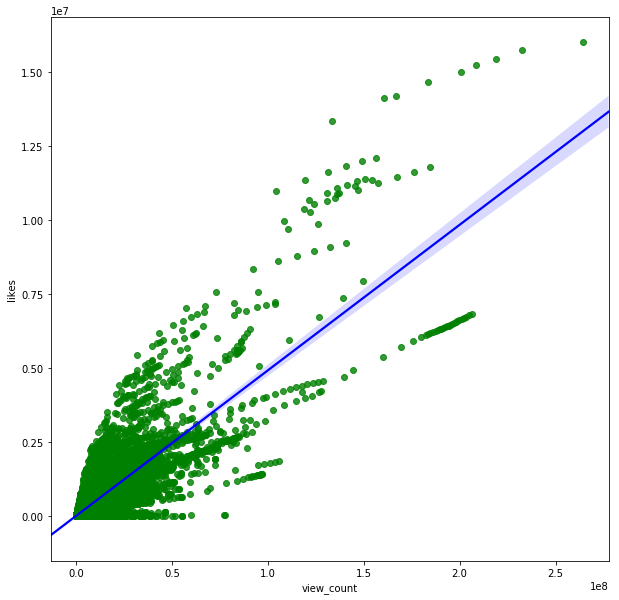

In [9]:
#to get a closer look at the scatterplot for likes/views
matplotlib.pyplot.figure(figsize=(10,10))
sns.regplot(x=us_yt['view_count'], y=us_yt['likes'],scatter_kws={"color": "green"}, line_kws={"color": "blue"});

# <a id="part-2"></a>
## World Data

# Now that we see the correlation coefficient for the US data, let's now see how much these trends stay the same in other countries.

In [10]:
#For these datasets we will use a subset of the columns, certain columns have characters that
#the dataframe can't currently handle and since those columns don't contain meaningful data for
#this use case I'm electing to simply drop them 
col_list = ['video_id', 'view_count', 'likes', 'dislikes', 'comment_count']

us_yt = pd.read_csv('../input/youtube-trending-video-dataset/US_youtube_trending_data.csv', usecols=col_list) #USA, remaking the dataframe in the same format as the others
ca_yt = pd.read_csv('../input/youtube-trending-video-dataset/CA_youtube_trending_data.csv', usecols=col_list) #Canada
de_yt = pd.read_csv('../input/youtube-trending-video-dataset/DE_youtube_trending_data.csv', usecols=col_list) #Germany
fr_yt = pd.read_csv('../input/youtube-trending-video-dataset/FR_youtube_trending_data.csv', usecols=col_list) #France
gb_yt = pd.read_csv('../input/youtube-trending-video-dataset/GB_youtube_trending_data.csv', usecols=col_list) #United Kingdom (Great Brittain)
in_yt = pd.read_csv('../input/youtube-trending-video-dataset/IN_youtube_trending_data.csv', usecols=col_list) #India
jp_yt = pd.read_csv('../input/youtube-trending-video-dataset/JP_youtube_trending_data.csv', usecols=col_list) #Japan
kr_yt = pd.read_csv('../input/youtube-trending-video-dataset/KR_youtube_trending_data.csv', usecols=col_list) #South Korea
mx_yt = pd.read_csv('../input/youtube-trending-video-dataset/MX_youtube_trending_data.csv', usecols=col_list) #Mexico
ru_yt = pd.read_csv('../input/youtube-trending-video-dataset/RU_youtube_trending_data.csv', usecols=col_list) #Russia

In [11]:
df_list = [us_yt, ca_yt, de_yt, fr_yt, gb_yt, in_yt, jp_yt, kr_yt, mx_yt, ru_yt]
df_name_list = ['United States', 'Canada', 'Germany', 'France', 'Great Brittain', 'India',
                'Japan', 'South Korea', 'Mexico', 'Russia']


In [12]:
views_df = pd.DataFrame(columns=['view_count', 'likes', 'dislikes', 'comment_count'])
likes_df = pd.DataFrame(columns=['view_count', 'likes', 'dislikes', 'comment_count'])

display(views_df, likes_df)

Empty DataFrame
Columns: [view_count, likes, dislikes, comment_count]
Index: []

Empty DataFrame
Columns: [view_count, likes, dislikes, comment_count]
Index: []

In [13]:
count = 0
while count != 10:
    print(df_name_list[count])
    current_df = df_list[count]
    _x = current_df[corrolation_list].corr()
    display(_x)
    views_df.loc[count] = _x.loc['view_count']
    likes_df.loc[count] = _x.loc['likes']
    count += 1
# Hid output to keep the size of the notebook down, feel free to unhide it to see more of the data

United States


view_count     likes  dislikes  comment_count
view_count       1.000000  0.844812  0.646885       0.514903
likes            0.844812  1.000000  0.622699       0.686961
dislikes         0.646885  0.622699  1.000000       0.519846
comment_count    0.514903  0.686961  0.519846       1.000000

Canada


view_count     likes  dislikes  comment_count
view_count       1.000000  0.831692  0.678061       0.502870
likes            0.831692  1.000000  0.616716       0.682481
dislikes         0.678061  0.616716  1.000000       0.498640
comment_count    0.502870  0.682481  0.498640       1.000000

Germany


view_count     likes  dislikes  comment_count
view_count       1.000000  0.841893  0.641704       0.496640
likes            0.841893  1.000000  0.597516       0.677494
dislikes         0.641704  0.597516  1.000000       0.509700
comment_count    0.496640  0.677494  0.509700       1.000000

France


view_count     likes  dislikes  comment_count
view_count       1.000000  0.879254  0.676726       0.737053
likes            0.879254  1.000000  0.649908       0.802832
dislikes         0.676726  0.649908  1.000000       0.627910
comment_count    0.737053  0.802832  0.627910       1.000000

Great Brittain


view_count     likes  dislikes  comment_count
view_count       1.000000  0.828828  0.656487       0.507287
likes            0.828828  1.000000  0.596624       0.684582
dislikes         0.656487  0.596624  1.000000       0.493548
comment_count    0.507287  0.684582  0.493548       1.000000

India


view_count     likes  dislikes  comment_count
view_count       1.000000  0.805410  0.144680       0.490065
likes            0.805410  1.000000  0.086948       0.646012
dislikes         0.144680  0.086948  1.000000       0.163194
comment_count    0.490065  0.646012  0.163194       1.000000

Japan


view_count     likes  dislikes  comment_count
view_count       1.000000  0.902873  0.671789       0.821024
likes            0.902873  1.000000  0.663451       0.837961
dislikes         0.671789  0.663451  1.000000       0.635749
comment_count    0.821024  0.837961  0.635749       1.000000

South Korea


view_count     likes  dislikes  comment_count
view_count       1.000000  0.888960  0.665941       0.812088
likes            0.888960  1.000000  0.667112       0.824450
dislikes         0.665941  0.667112  1.000000       0.648440
comment_count    0.812088  0.824450  0.648440       1.000000

Mexico


view_count     likes  dislikes  comment_count
view_count       1.000000  0.852304  0.639111       0.718841
likes            0.852304  1.000000  0.610230       0.758354
dislikes         0.639111  0.610230  1.000000       0.577008
comment_count    0.718841  0.758354  0.577008       1.000000

Russia


view_count     likes  dislikes  comment_count
view_count       1.000000  0.861723  0.555836       0.658294
likes            0.861723  1.000000  0.545938       0.768884
dislikes         0.555836  0.545938  1.000000       0.509259
comment_count    0.658294  0.768884  0.509259       1.000000

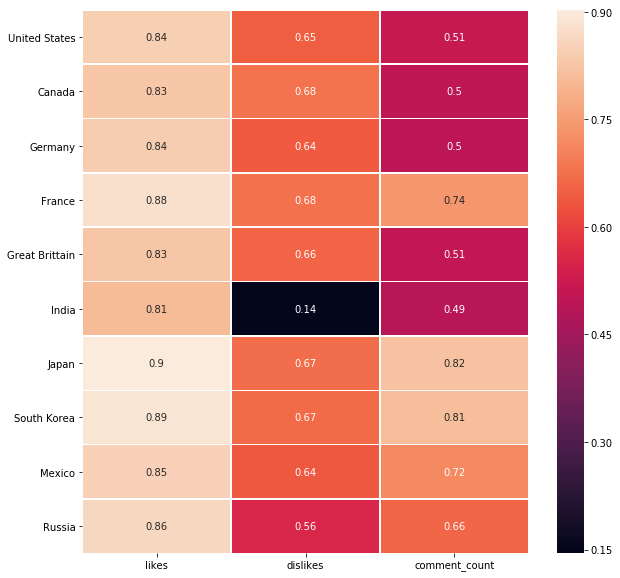

In [14]:
views_df = views_df.drop(axis=1, labels='view_count') #remove redundant column
views_df.index = df_name_list
matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(views_df, annot=True, linewidths=.5);
#display(views_df.style.background_gradient()) ## MasterData frame with all the correlation coefficients in relation to views 

In [15]:
likes_df = likes_df.drop(axis=1, labels='likes') #remove redundant column
likes_df.index = df_name_list
display(likes_df.style.background_gradient()) ## Master Data frame with all the corrolation coefficients in relation to likes

In [16]:
dislikes_df = likes_df.drop(axis=1, labels='dislikes') #remove redundant column
dislikes_df.index = df_name_list
display(dislikes_df.style.background_gradient()) ## Master Data frame with all the corrolation coefficients in relation to likes

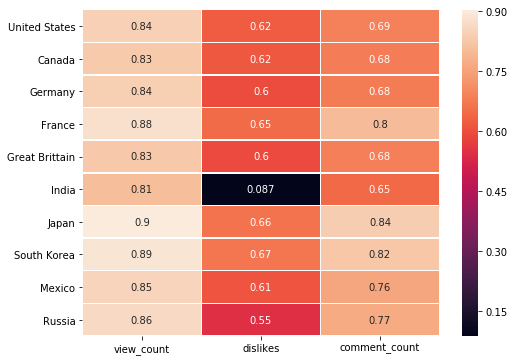

In [17]:
matplotlib.pyplot.figure(figsize=(8,6))
sns.heatmap(likes_df, annot=True, linewidths=.5);

We can see that there is a high correlation between the number of likes on a video and the number of views. Also an interesting note: likes and comment count has an incredibly high correlation in Japan, Japan also has a weirdly high correlation between dislikes, likes and views (one could also rephrase this to a high correlation between reactions and views). There are other interesting little tidbits in the data.

(obligatory correlation =/= causation speil)Without seeing this data in timelapse one couldn't determine if a particular variable is the cause of the other. For instance: are videos that are watched frequently more likely to be liked by a viewer, or does a video receiving a large number of likes cause it to be recommended frequently. Or perhaps neither is the cause of the other and perhaps some confounding variable is the cause of both of these. 

In [18]:
Master_df = pd.DataFrame(columns=['view_count', 'likes', 'dislikes', 'comment_count', 'country'])
display(Master_df)

Empty DataFrame
Columns: [view_count, likes, dislikes, comment_count, country]
Index: []

In [19]:
#now to create a master dataframe with all the datapoints in it
count = 0
entries = 0
while count != 10:
    current_df = df_list[count]
    entries = entries + len(current_df)
    country_name = df_name_list[count]
    current_df['country'] = country_name
    Master_df = pd.merge(Master_df, current_df, how='outer')
    count += 1
print(entries)

1228562


In [20]:
print(entries) 
print(len(Master_df)) #comparing the total number of entries to make sure I didn't lose any data points 
display(Master_df.sample(10))


1228562
1228562


video_id  view_count   likes  dislikes  comment_count  \
880729   z2QRzFm6Xio       93425    7523        53            572   
867590   g3vkErBgWn4      350513    9591        42            968   
94       JXzk8G9aXI8     1048314   51361       891            965   
294882   HL8E7GhK9dQ      118804    4615       615            567   
182027   2A2NY29iQdI     4405785  245775      1800          10609   
27766    Bbyftsl7Owo    15246128  793564     23427          44064   
591322   Zq9PYw_0Asw      391650   11664       401            746   
210992   SuaJn__sKfE     1285268   84880      1290            808   
378846   7laz4-nKYFY      143451    8874        55            268   
1090508  NbSluEiP7mA     1448356   63887         0           1489   

                country  
880729      South Korea  
867590      South Korea  
94        United States  
294882          Germany  
182027           Canada  
27766     United States  
591322   Great Brittain  
210992           Canada  
378846           France  
1090508          Mexico

In [21]:
Master_df[corrolation_list].corr().style.background_gradient()



As you can see below the trend below seems to follow for each country in the datasets

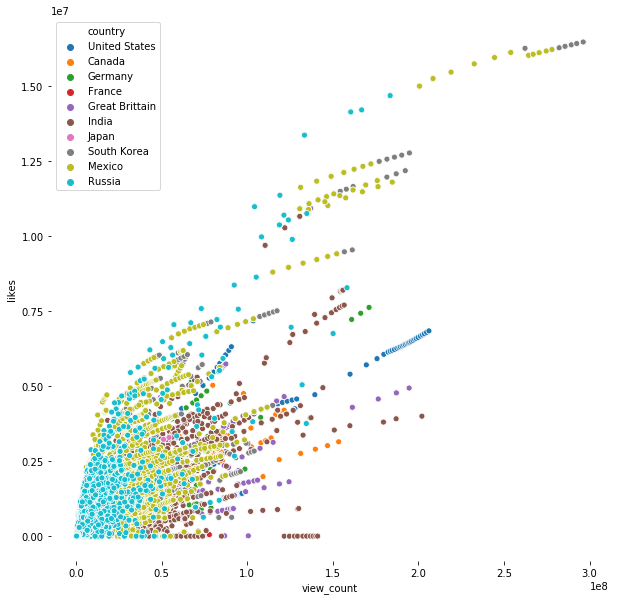

In [22]:
matplotlib.pyplot.figure(figsize=(10,10))
sns.scatterplot(x=Master_df["view_count"], y=Master_df["likes"], hue=Master_df["country"])
sns.despine(bottom=True, left=True);

# SHOWING MOST COMMON WORDS USED IN TITLE FOR EACH COUTRY BY WORD CLOUD

In [23]:
col_list = ["title"]

us_yt = pd.read_csv('../input/youtube-trending-video-dataset/US_youtube_trending_data.csv', usecols=col_list) #USA, remaking the dataframe in the same format as the others
ca_yt = pd.read_csv('../input/youtube-trending-video-dataset/CA_youtube_trending_data.csv', usecols=col_list) #Canada
de_yt = pd.read_csv('../input/youtube-trending-video-dataset/DE_youtube_trending_data.csv', usecols=col_list) #Germany
fr_yt = pd.read_csv('../input/youtube-trending-video-dataset/FR_youtube_trending_data.csv', usecols=col_list) #France
gb_yt = pd.read_csv('../input/youtube-trending-video-dataset/GB_youtube_trending_data.csv', usecols=col_list) #United Kingdom (Great Brittain)
in_yt = pd.read_csv('../input/youtube-trending-video-dataset/IN_youtube_trending_data.csv', usecols=col_list) #India
jp_yt = pd.read_csv('../input/youtube-trending-video-dataset/JP_youtube_trending_data.csv', usecols=col_list) #Japan
kr_yt = pd.read_csv('../input/youtube-trending-video-dataset/KR_youtube_trending_data.csv', usecols=col_list) #South Korea
mx_yt = pd.read_csv('../input/youtube-trending-video-dataset/MX_youtube_trending_data.csv', usecols=col_list) #Mexico
ru_yt = pd.read_csv('../input/youtube-trending-video-dataset/RU_youtube_trending_data.csv', usecols=col_list) #Russia

In [24]:
df_list = [us_yt, ca_yt, de_yt, fr_yt, gb_yt, in_yt, jp_yt, kr_yt, mx_yt, ru_yt]
df_name_list = ['United States', 'Canada', 'Germany', 'France', 'Great Brittain', 'India',
                'Japan', 'South Korea', 'Mexico', 'Russia']


In [25]:

#for a in df_list:
def wordcld(a,j):
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    title_words = list(a["title"].apply(lambda x: x.split()))
    title_words = [x for y in title_words for x in y]
    #print(df_name_list[j])
    wc = WordCloud(width=1200, height=500, 
                                collocations=False, background_color="white", 
                                colormap="tab20b").generate(" ".join(title_words))
    plt.figure(figsize=(15,10))
    plt.imshow(wc, interpolation='bilinear')
    #plt.axis("off")
    plt.ylabel(df_name_list[j])

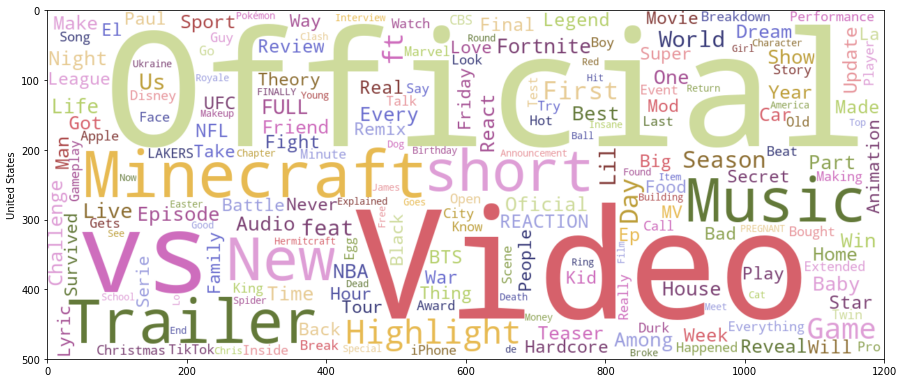

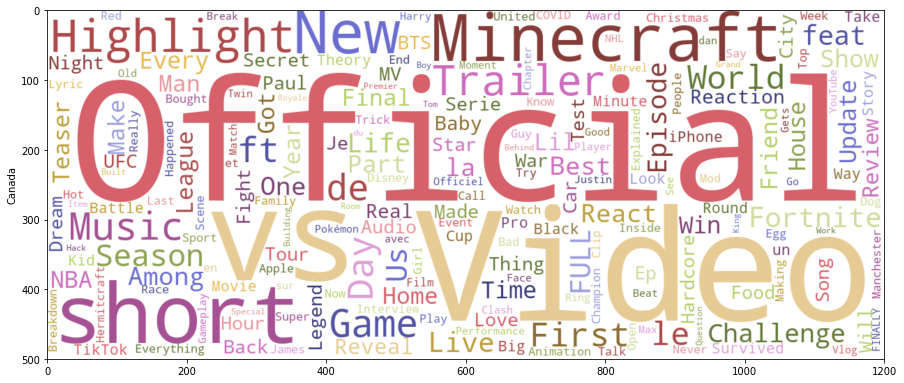

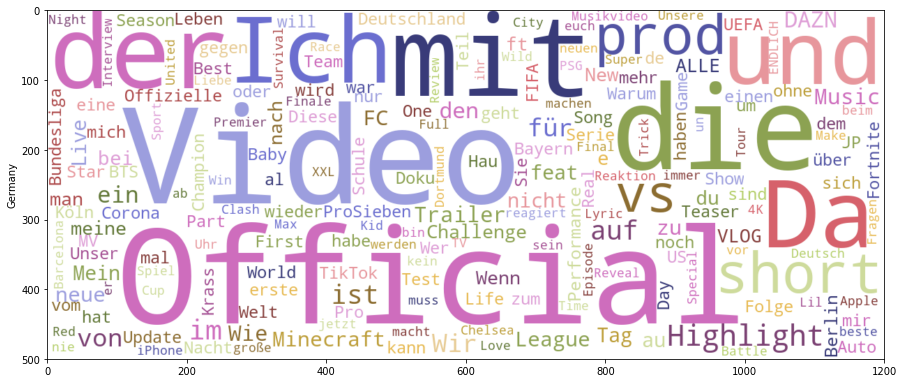

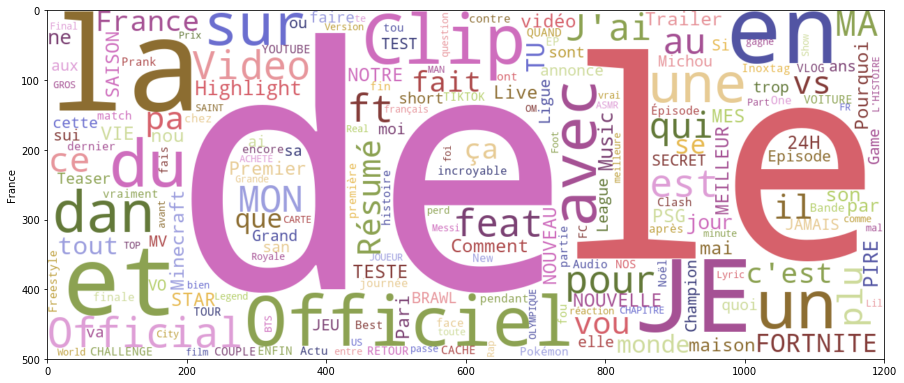

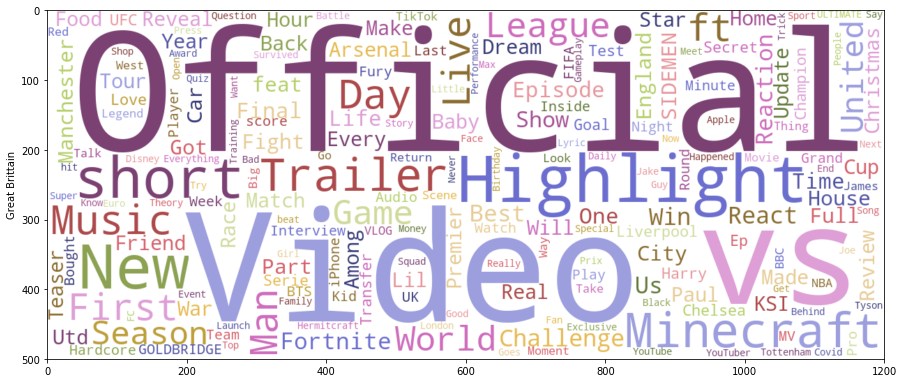

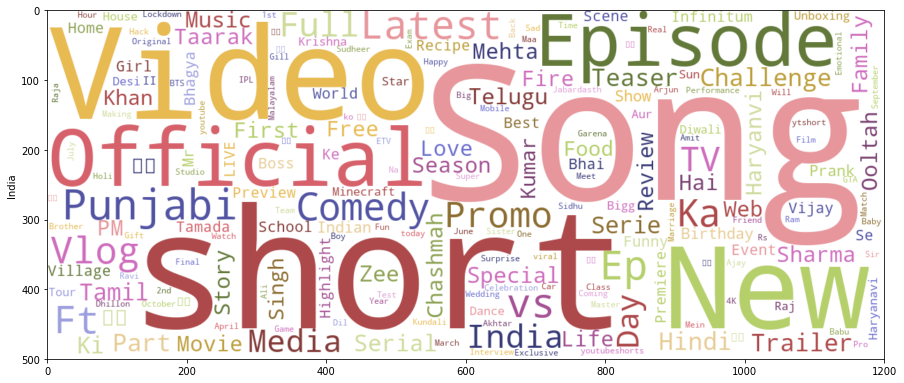

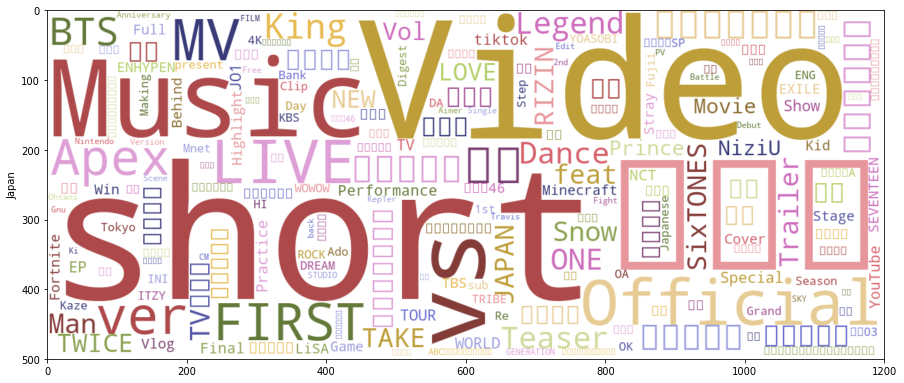

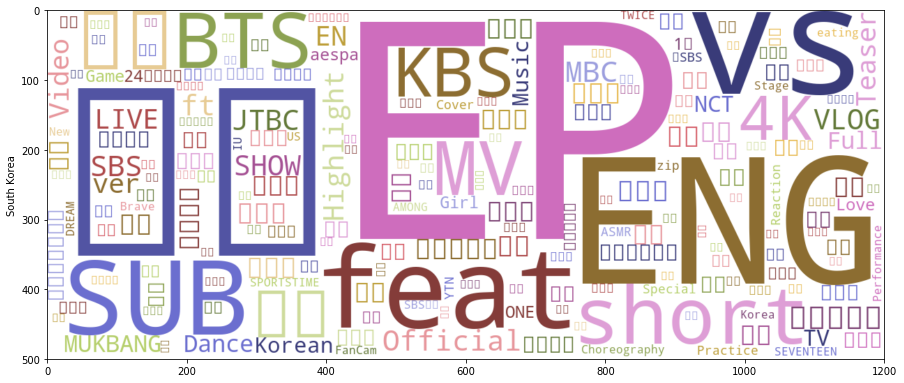

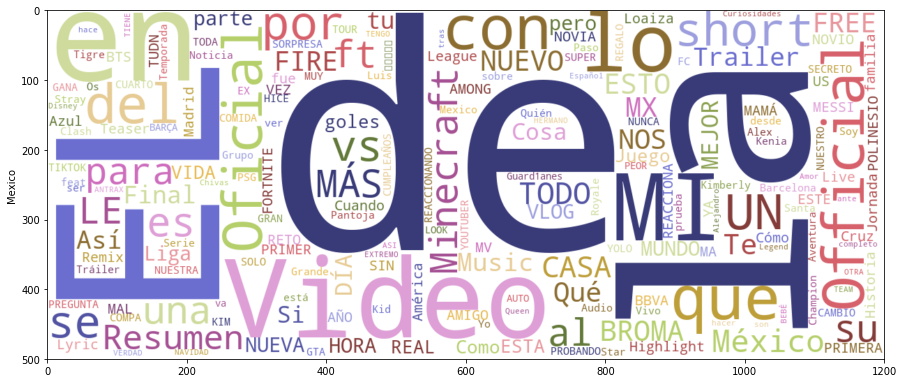

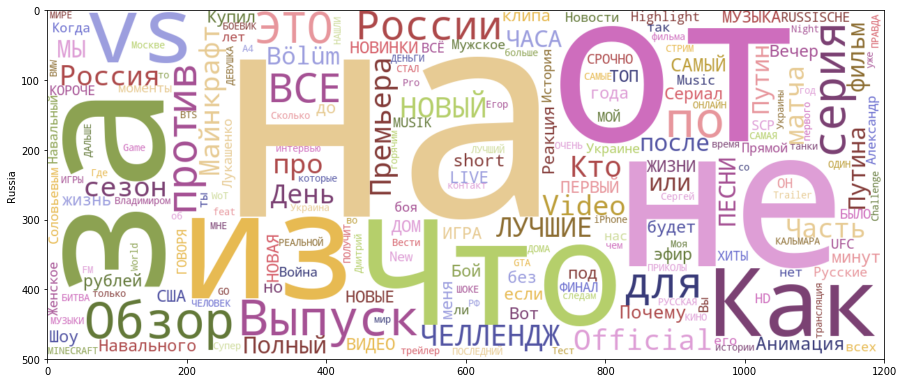

In [26]:
j=0
while j<len(df_list):
    #print(df_name_list[j])
    wordcld(df_list[j],j)
    j=j+1
    

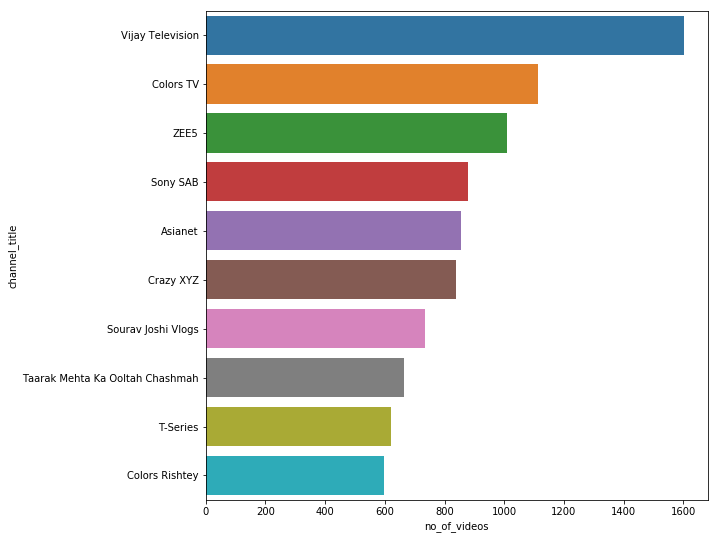

In [27]:
ind= pd.read_csv('../input/youtube-trending-video-dataset/IN_youtube_trending_data.csv')
l=ind.channelTitle.value_counts()[:10].index
video_count = pd.DataFrame({'channel_title':l,'no_of_videos':ind.channelTitle.value_counts()[:10]})
video_count.index=[i for i in range(1,11)]
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(y="channel_title",x="no_of_videos",data = video_count)

In [28]:
ind[ind["view_count"].idxmax():ind["view_count"].idxmax()+1]

video_id                             title           publishedAt  \
52057  WMweEpGlu_U  BTS (방탄소년단) 'Butter' Official MV  2021-05-21T03:46:13Z   

                      channelId channelTitle  categoryId  \
52057  UC3IZKseVpdzPSBaWxBxundA  HYBE LABELS          10   

              trending_date                             tags  view_count  \
52057  2021-05-30T00:00:00Z  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   264407389   

          likes  dislikes  comment_count  \
52057  16021542    150990        6738565   

                                       thumbnail_link  comments_disabled  \
52057  https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg              False   

       ratings_disabled                                        description  
52057             False  BTS (방탄소년단) 'Butter' Official MV Credits: Dire...

          channel_title  no_of_videos
1                   NFL           820
2                   NBA           704
3          SSSniperWolf           555
4        MrBeast Gaming           430
5               SSundee           415
6               MrBeast           382
7                  ESPN           377
8   Saturday Night Live           368
9          Dude Perfect           356
10   The Game Theorists           319


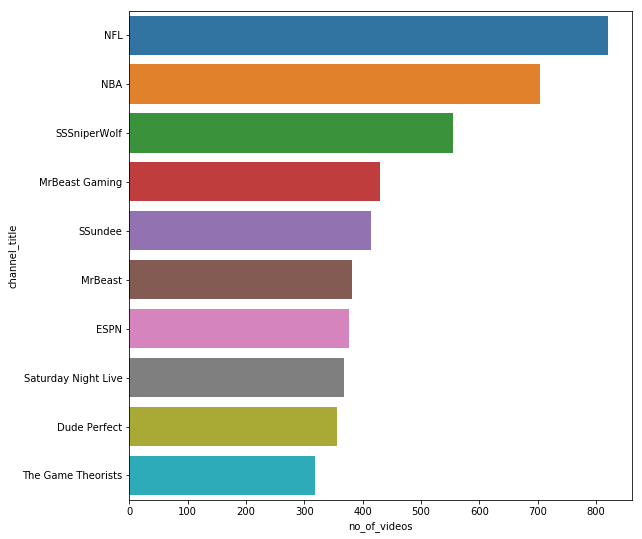

In [29]:
us= pd.read_csv('../input/youtube-trending-video-dataset/US_youtube_trending_data.csv')
l=us.channelTitle.value_counts()[:10].index
video_count = pd.DataFrame({'channel_title':l,'no_of_videos':us.channelTitle.value_counts()[:10]})
video_count.index=[i for i in range(1,11)]
print(video_count)
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(y="channel_title",x="no_of_videos",data = video_count)

In [30]:
us['views_mil'] = us['view_count'] / 1000000
l=us[['channelTitle','views_mil']].groupby('channelTitle')\
.agg(['mean','count'])\
.sort_values(by=('views_mil','count'), ascending=False)[:10].index
f=pd.DataFrame(us[['channelTitle','views_mil']].groupby('channelTitle')\
.agg(['mean','count'])\
.sort_values(by=('views_mil','count'), ascending=False)[:10])
f["channelTitle"]=l
f.index=[i for i in range(1,11)]
f.columns
f=f[[('channelTitle',      ''),(    'views_mil',  'mean'),(    'views_mil', 'count')]]
cm = sns.light_palette("green", as_cmap=True)

f.style.background_gradient(cmap=cm).set_precision(2).highlight_null('red')

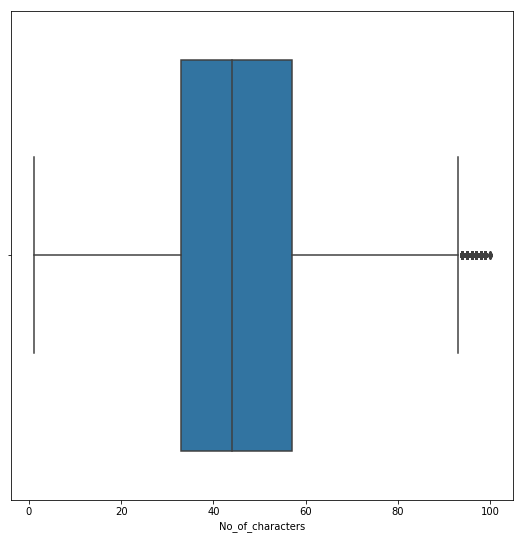

In [31]:
us= pd.read_csv('../input/youtube-trending-video-dataset/US_youtube_trending_data.csv')
import re
import nltk
s=pd.Series(us["title"])
l=[]
for i in range(0,len(s)):
        s[i]= re.sub('[^a-zA-Z]', ' ',s[i])
        s[i]=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",s[i])
        s[i]=re.sub("(\\d|\\W)+"," ",s[i])
        l.append(len(s[i]))
matplotlib.pyplot.figure(figsize=(9,9))
ax=sns.boxplot(l)
ax.set(xlabel="No_of_characters")
us["filter_title"]=s
us["title_length"]=pd.Series(l)

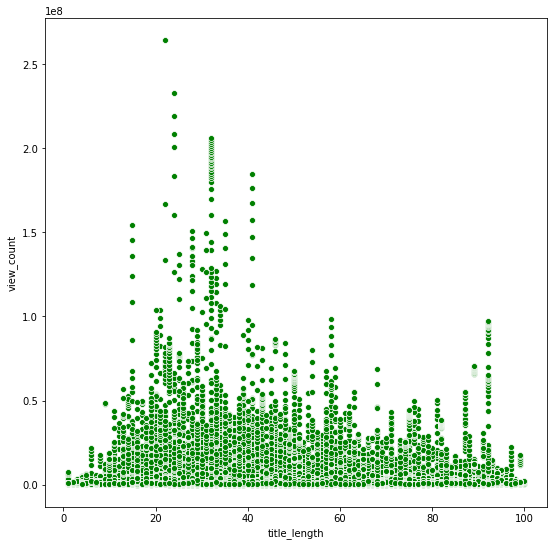

In [32]:
matplotlib.pyplot.figure(figsize=(9,9))
ax=sns.scatterplot(data=us,y="view_count",x="title_length",color="green")

In [33]:
us["trending_year"]=pd.DatetimeIndex(us['trending_date']).year

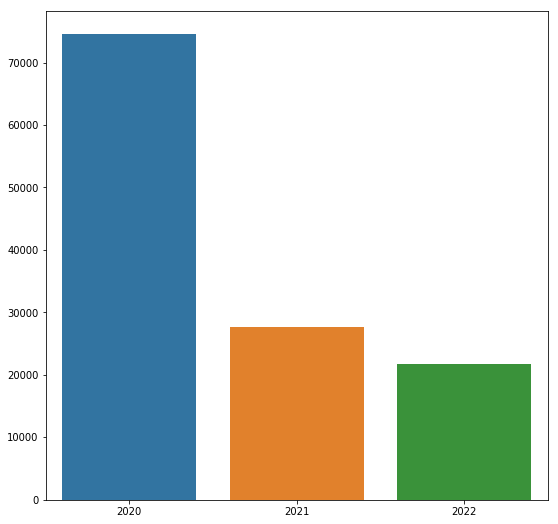

In [34]:
#us["trending_year"]= us["trending_date"].apply(lambda x: '20' + x[:2])
m=list(us["trending_year"].value_counts())
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x=list(us["trending_year"].unique()),y=m)

In [35]:
us["trendingDate"]=pd.DatetimeIndex(us['trending_date']).date

In [36]:
print(us["trendingDate"][:5])
us["trendingDate"]=pd.to_datetime(us["trendingDate"],format = "%Y.%m.%d")
#us["trending_date"]=pd.to_datetime(us["trending_date]"]).dt.date
us["publish_date"]=pd.to_datetime(us["publishedAt"]).dt.date
us["publish_clock"]=pd.to_datetime(us["publishedAt"]).dt.hour
print(us["publish_clock"][:5])
us["publish_date"]=pd.to_datetime(us["publish_date"],format = "%Y/%m/%d")
l=[]
for i in us["publish_date"]:
    l.append(i.day_name())
us["publish_day"]= l

0    2020-08-12
1    2020-08-12
2    2020-08-12
3    2020-08-12
4    2020-08-12
Name: trendingDate, dtype: object
0    19
1    17
2    16
3    16
4    15
Name: publish_clock, dtype: int64


Index(['Friday', 'Monday', 'Tuesday', 'Wednesday', 'Sunday', 'Thursday',
       'Saturday'],
      dtype='object')


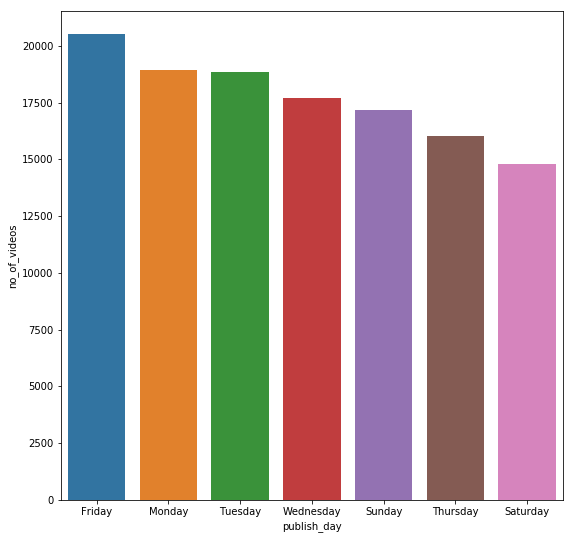

In [37]:
x=us["publish_day"].value_counts()
print(x.index)
h=pd.DataFrame({"publish_day":x.index,"no_of_videos":x})
h.index=[i for i in range(0,7)]
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x="publish_day",y="no_of_videos",data=h)

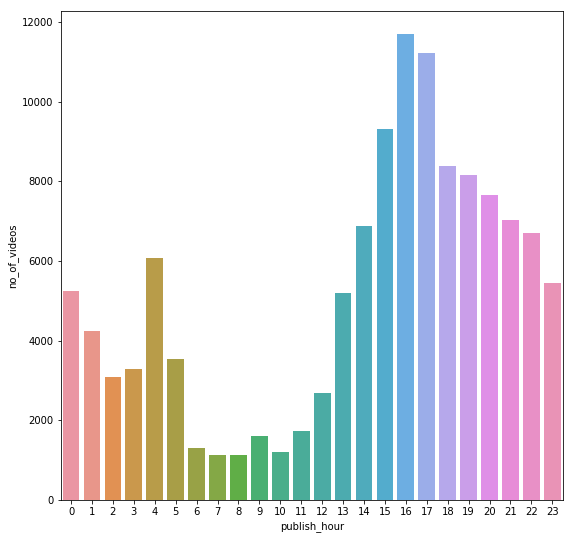

In [38]:
c=us["publish_clock"].value_counts()
h=pd.DataFrame({"publish_hour":c.index,"no_of_videos":c})
h.index=[i for i in range(0,24)]
h=h.sort_values("publish_hour")
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x="publish_hour",y="no_of_videos",data=h)

[(0, 35)]

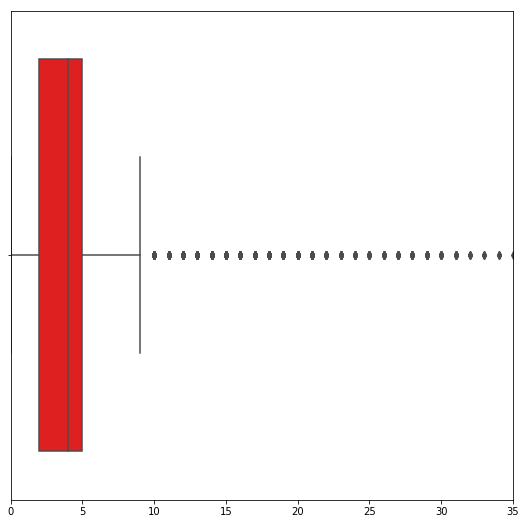

In [39]:
us["time_diff"]=us["trendingDate"]-us["publish_date"]
l=list(us["time_diff"].dt.days)
matplotlib.pyplot.figure(figsize=(9,9))
g=sns.boxplot(l,color="red")
g.set(xlim=(0,35))

In [40]:
with open("../input/youtube-trending-video-dataset/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
us['category_name'] = us['categoryId'].map(cat_dict)

In [41]:
with open("../input/youtube-trending-video-dataset/IN_category_id.json") as g:
    categories = json.load(g)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
ind['category_name'] = ind['categoryId'].map(cat_dict)

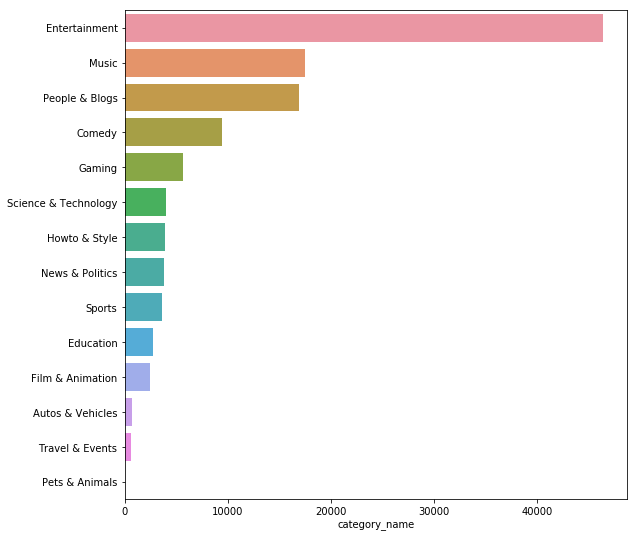

In [42]:
i=ind["category_name"].value_counts().index
m=ind["category_name"].value_counts()
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x=m,y=i)

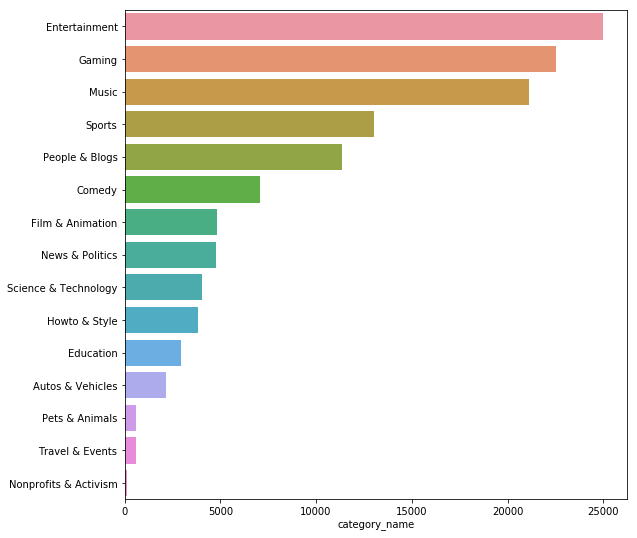

In [43]:
i=us["category_name"].value_counts().index
m=us["category_name"].value_counts()
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x=m,y=i)

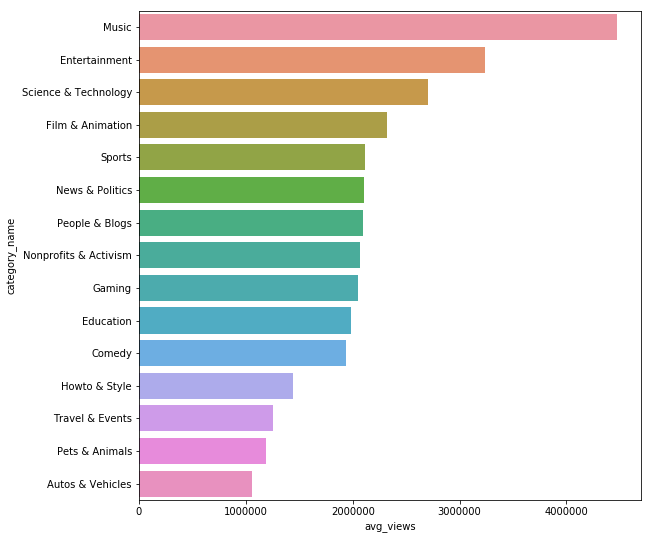

In [44]:
l=us.groupby("category_name").sum()["view_count"]/us["category_name"].value_counts()
s=pd.DataFrame({"category_name":l.index,"avg_views":l})
s=s.sort_values("avg_views",ascending=False)
s.index=[i for i in range(0,15)]
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x="avg_views",y="category_name",data=s)

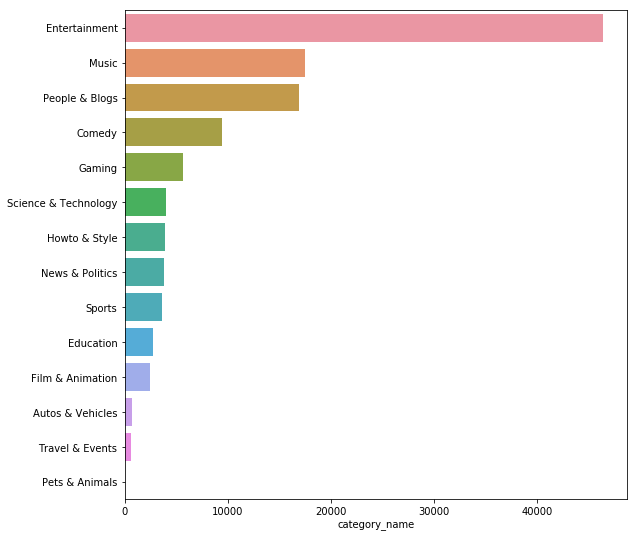

In [45]:
i=ind["category_name"].value_counts().index
m=ind["category_name"].value_counts()
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x=m,y=i)

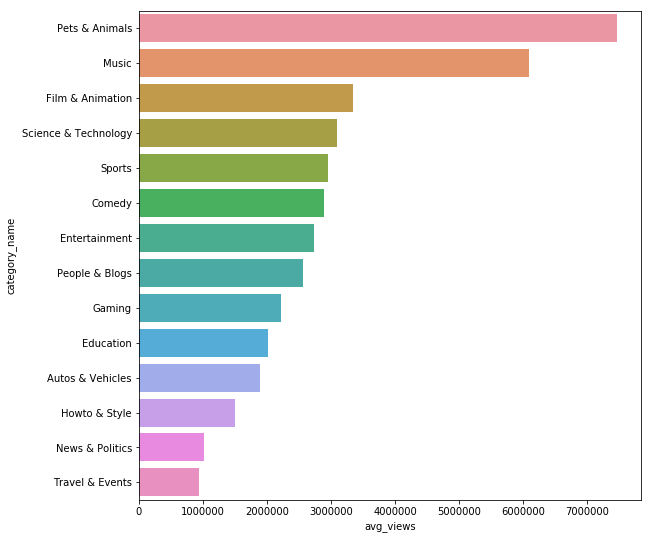

In [46]:
l=ind.groupby("category_name").sum()["view_count"]/ind["category_name"].value_counts()
s=pd.DataFrame({"category_name":l.index,"avg_views":l})
s=s.sort_values("avg_views",ascending=False)
s.index=[i for i in range(0,14)]
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x="avg_views",y="category_name",data=s)